In [1]:
# Load in sim data
import hax
from make_minitree import Peaks

hax.init(experiment='XENON1T',
         use_runs_db=False,
         pax_version_policy='loose',
         main_data_paths=['~/data/er_ss_sim/'],
         minitree_paths = ['~/data/er_ss_sim/'])

INFO:hax.__init__] Not looking for datasets in runs, db since you put use_runs_db = False


In [2]:
sim = hax.minitrees.load("rn_sim",[Peaks])

DEBUG:hax.minitrees] Minitree rn_sim_Peaks.root not found
DEBUG:hax.minitrees] Not found in non-preferred formats either. Minitree will be created.


Could not find run number for rn_sim, got exception <class 'AttributeError'>: 'NoneType' object has no attribute 'query'. Setting run number to 0.
Don't know a run named rn_sim, trying to find it anyway...


Run rn_sim: Making Peaks minitree: 100%|██████████| 3000/3000 [00:02<00:00, 1148.62it/s]
DEBUG:hax.__init__] Extraction completed, now concatenating data
DEBUG:hax.minitrees] Retrieved Peaks minitree data for dataset rn_sim


Don't know a run named rn_sim, trying to find it anyway...


DEBUG:hax.minitrees] Found minitree at /home/shawaf/data/er_ss_sim/rn_sim_Peaks.root
DEBUG:hax.minitrees] Removing weird index column


In [15]:
# Import Rn data
import pandas as pd
import os

rn_samp = pd.read_pickle('/home/shawaf/calibration_data/pax_v6.6.5_rn_event_combine/170313_1055.pkl')

rn = pd.DataFrame(columns = list(rn_samp))
    
for filename in os.listdir('/home/shawaf/calibration_data/pax_v6.6.5_rn_event_combine/'):
    df = pd.read_pickle('/home/shawaf/calibration_data/pax_v6.6.5_rn_event_combine/' + str(filename))
    rn = rn.append(df)
    
rn = rn[rn.s2>200]

In [16]:
simdata = sim.dropna()

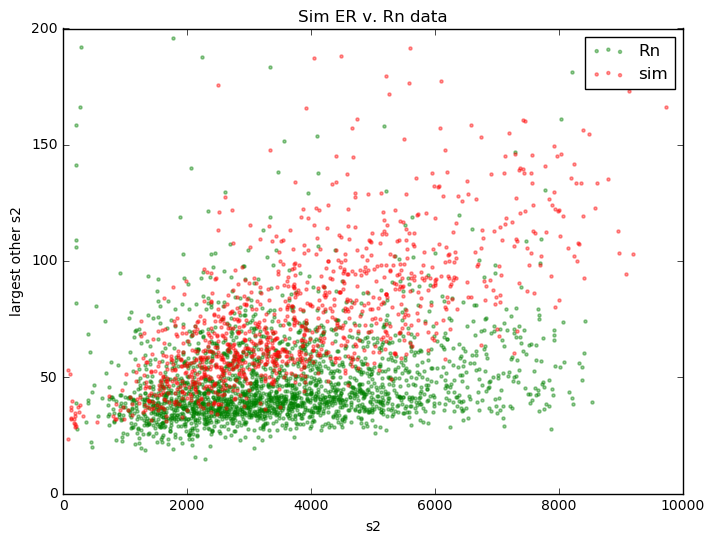

In [36]:
import matplotlib
import matplotlib.pyplot as plt


plt.figure(figsize=(8,6))
plt.scatter(rn.s2,rn.s2_1_area,c='g',marker='.',alpha=0.4, edgecolors = 'g',label="Rn")
plt.scatter(simdata.s2,simdata.s2_1_area,c='r',marker='.',alpha=0.4,  edgecolors = 'r',label = "sim")
plt.xlim(0,10000)
plt.ylim(0,200)
plt.legend(loc = 'upper right')
plt.title('Sim ER v. Rn data')
plt.xlabel('s2')
plt.ylabel('largest other s2')
plt.show()

In [37]:
rn.columns

Index(['cs1', 'cs2', 'drift_time', 'event_number', 'run_number', 's1',
       's1_area_fraction_top', 's1_pattern_fit', 's1_range_50p_area',
       's1_rise_time', 's2', 's2_1_area', 's2_1_area_fraction_top',
       's2_1_corrected_area', 's2_1_delay_is1', 's2_1_delay_is2',
       's2_1_range_50p_area', 's2_1_x', 's2_1_y', 's2_1_z', 's2_2_area',
       's2_2_area_fraction_top', 's2_2_corrected_area', 's2_2_delay_is1',
       's2_2_delay_is2', 's2_2_range_50p_area', 's2_2_x', 's2_2_y', 's2_2_z',
       's2_3_area', 's2_3_area_fraction_top', 's2_3_corrected_area',
       's2_3_delay_is1', 's2_3_delay_is2', 's2_3_range_50p_area', 's2_3_x',
       's2_3_y', 's2_3_z', 's2_4_area', 's2_4_area_fraction_top',
       's2_4_corrected_area', 's2_4_delay_is1', 's2_4_delay_is2',
       's2_4_range_50p_area', 's2_4_x', 's2_4_y', 's2_4_z', 's2_5_area',
       's2_5_area_fraction_top', 's2_5_corrected_area', 's2_5_delay_is1',
       's2_5_delay_is2', 's2_5_range_50p_area', 's2_5_x', 's2_5_y', 's2_5_z'

/home/shawaf/anaconda3/envs/pax/lib/python3.4/site-packages/numpy/lib/function_base.py:583: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/home/shawaf/anaconda3/envs/pax/lib/python3.4/site-packages/numpy/lib/function_base.py:584: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


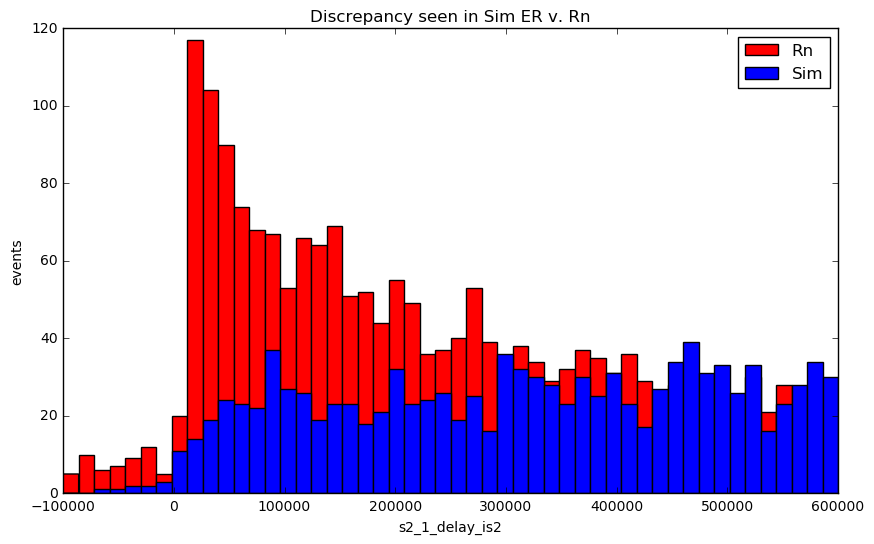

In [54]:
plt.figure(figsize=(10,6))
plt.hist(rn.s2_1_delay_is2,range = [-100e3, 600e3], color='r',bins = 50,label = 'Rn')
plt.hist(sim.s2_1_delay_is2,range = [-100e3, 600e3], bins = 50, label='Sim')
plt.title("Discrepancy seen in Sim ER v. Rn")
plt.xlabel("s2_1_delay_is2")
plt.ylabel("events")
plt.legend()
plt.show()